<a href="https://colab.research.google.com/github/vestinabert/Image_Quality_Assessment/blob/main/Image_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving italijoskelione011.jpg to italijoskelione011.jpg


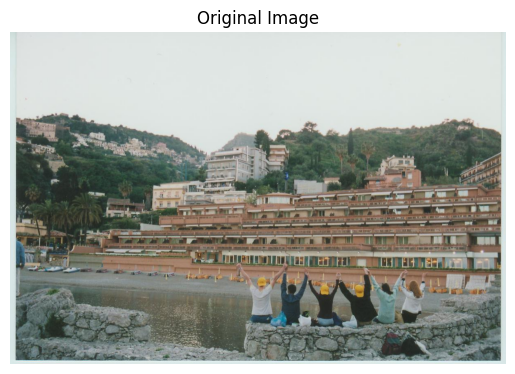

In [1]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

# Upload an image
uploaded = files.upload()

# Read the uploaded image
for filename in uploaded.keys():
    image = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct visualization

# Display the original image
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()
